In [1]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [2]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [3]:
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

In [4]:
x_train = x_train / float(max_idx_value)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [6]:
y_train = np_utils.to_categorical(y_train)

In [7]:
y_train.shape

(50, 12)

In [8]:
one_hot_vec_size = y_train.shape[1]

In [10]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
history = LossHistory() # 손실 이력 객체 생성
history.init()


In [13]:
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

Epoch 1/2000
5/5 - 0s - loss: 2.3805 - accuracy: 0.3200
Epoch 2/2000
5/5 - 0s - loss: 2.3242 - accuracy: 0.3200
Epoch 3/2000
5/5 - 0s - loss: 2.2749 - accuracy: 0.3400
Epoch 4/2000
5/5 - 0s - loss: 2.2254 - accuracy: 0.3400
Epoch 5/2000
5/5 - 0s - loss: 2.1866 - accuracy: 0.3400
Epoch 6/2000
5/5 - 0s - loss: 2.1427 - accuracy: 0.3400
Epoch 7/2000
5/5 - 0s - loss: 2.1076 - accuracy: 0.3400
Epoch 8/2000
5/5 - 0s - loss: 2.0720 - accuracy: 0.3400
Epoch 9/2000
5/5 - 0s - loss: 2.0410 - accuracy: 0.3400
Epoch 10/2000
5/5 - 0s - loss: 2.0128 - accuracy: 0.3400
Epoch 11/2000
5/5 - 0s - loss: 1.9888 - accuracy: 0.3400
Epoch 12/2000
5/5 - 0s - loss: 1.9716 - accuracy: 0.3400
Epoch 13/2000
5/5 - 0s - loss: 1.9549 - accuracy: 0.3400
Epoch 14/2000
5/5 - 0s - loss: 1.9397 - accuracy: 0.3400
Epoch 15/2000
5/5 - 0s - loss: 1.9276 - accuracy: 0.3400
Epoch 16/2000
5/5 - 0s - loss: 1.9153 - accuracy: 0.3400
Epoch 17/2000
5/5 - 0s - loss: 1.9060 - accuracy: 0.3400
Epoch 18/2000
5/5 - 0s - loss: 1.8980 - 

Epoch 145/2000
5/5 - 0s - loss: 1.4974 - accuracy: 0.4200
Epoch 146/2000
5/5 - 0s - loss: 1.4966 - accuracy: 0.4200
Epoch 147/2000
5/5 - 0s - loss: 1.4976 - accuracy: 0.4200
Epoch 148/2000
5/5 - 0s - loss: 1.4940 - accuracy: 0.4200
Epoch 149/2000
5/5 - 0s - loss: 1.4928 - accuracy: 0.4200
Epoch 150/2000
5/5 - 0s - loss: 1.4908 - accuracy: 0.4200
Epoch 151/2000
5/5 - 0s - loss: 1.4931 - accuracy: 0.4600
Epoch 152/2000
5/5 - 0s - loss: 1.4890 - accuracy: 0.4600
Epoch 153/2000
5/5 - 0s - loss: 1.4879 - accuracy: 0.4400
Epoch 154/2000
5/5 - 0s - loss: 1.4865 - accuracy: 0.4600
Epoch 155/2000
5/5 - 0s - loss: 1.4847 - accuracy: 0.4400
Epoch 156/2000
5/5 - 0s - loss: 1.4828 - accuracy: 0.4400
Epoch 157/2000
5/5 - 0s - loss: 1.4825 - accuracy: 0.4600
Epoch 158/2000
5/5 - 0s - loss: 1.4830 - accuracy: 0.4200
Epoch 159/2000
5/5 - 0s - loss: 1.4806 - accuracy: 0.4200
Epoch 160/2000
5/5 - 0s - loss: 1.4800 - accuracy: 0.4200
Epoch 161/2000
5/5 - 0s - loss: 1.4772 - accuracy: 0.4200
Epoch 162/2000

Epoch 287/2000
5/5 - 0s - loss: 1.3540 - accuracy: 0.5400
Epoch 288/2000
5/5 - 0s - loss: 1.3541 - accuracy: 0.4800
Epoch 289/2000
5/5 - 0s - loss: 1.3513 - accuracy: 0.5200
Epoch 290/2000
5/5 - 0s - loss: 1.3508 - accuracy: 0.5400
Epoch 291/2000
5/5 - 0s - loss: 1.3509 - accuracy: 0.5400
Epoch 292/2000
5/5 - 0s - loss: 1.3502 - accuracy: 0.5400
Epoch 293/2000
5/5 - 0s - loss: 1.3488 - accuracy: 0.5400
Epoch 294/2000
5/5 - 0s - loss: 1.3486 - accuracy: 0.5400
Epoch 295/2000
5/5 - 0s - loss: 1.3464 - accuracy: 0.5400
Epoch 296/2000
5/5 - 0s - loss: 1.3460 - accuracy: 0.5400
Epoch 297/2000
5/5 - 0s - loss: 1.3451 - accuracy: 0.5400
Epoch 298/2000
5/5 - 0s - loss: 1.3446 - accuracy: 0.5400
Epoch 299/2000
5/5 - 0s - loss: 1.3440 - accuracy: 0.5400
Epoch 300/2000
5/5 - 0s - loss: 1.3428 - accuracy: 0.5400
Epoch 301/2000
5/5 - 0s - loss: 1.3433 - accuracy: 0.5200
Epoch 302/2000
5/5 - 0s - loss: 1.3435 - accuracy: 0.4800
Epoch 303/2000
5/5 - 0s - loss: 1.3420 - accuracy: 0.4800
Epoch 304/2000

Epoch 429/2000
5/5 - 0s - loss: 1.2494 - accuracy: 0.5200
Epoch 430/2000
5/5 - 0s - loss: 1.2496 - accuracy: 0.5400
Epoch 431/2000
5/5 - 0s - loss: 1.2485 - accuracy: 0.5200
Epoch 432/2000
5/5 - 0s - loss: 1.2482 - accuracy: 0.5200
Epoch 433/2000
5/5 - 0s - loss: 1.2457 - accuracy: 0.5200
Epoch 434/2000
5/5 - 0s - loss: 1.2462 - accuracy: 0.5200
Epoch 435/2000
5/5 - 0s - loss: 1.2441 - accuracy: 0.5200
Epoch 436/2000
5/5 - 0s - loss: 1.2447 - accuracy: 0.5600
Epoch 437/2000
5/5 - 0s - loss: 1.2430 - accuracy: 0.5600
Epoch 438/2000
5/5 - 0s - loss: 1.2433 - accuracy: 0.5200
Epoch 439/2000
5/5 - 0s - loss: 1.2420 - accuracy: 0.5200
Epoch 440/2000
5/5 - 0s - loss: 1.2440 - accuracy: 0.5400
Epoch 441/2000
5/5 - 0s - loss: 1.2422 - accuracy: 0.5600
Epoch 442/2000
5/5 - 0s - loss: 1.2393 - accuracy: 0.5600
Epoch 443/2000
5/5 - 0s - loss: 1.2404 - accuracy: 0.5600
Epoch 444/2000
5/5 - 0s - loss: 1.2398 - accuracy: 0.5200
Epoch 445/2000
5/5 - 0s - loss: 1.2385 - accuracy: 0.5400
Epoch 446/2000

Epoch 571/2000
5/5 - 0s - loss: 1.1651 - accuracy: 0.5800
Epoch 572/2000
5/5 - 0s - loss: 1.1628 - accuracy: 0.5800
Epoch 573/2000
5/5 - 0s - loss: 1.1635 - accuracy: 0.5800
Epoch 574/2000
5/5 - 0s - loss: 1.1636 - accuracy: 0.5800
Epoch 575/2000
5/5 - 0s - loss: 1.1633 - accuracy: 0.5800
Epoch 576/2000
5/5 - 0s - loss: 1.1617 - accuracy: 0.6000
Epoch 577/2000
5/5 - 0s - loss: 1.1621 - accuracy: 0.6000
Epoch 578/2000
5/5 - 0s - loss: 1.1623 - accuracy: 0.6000
Epoch 579/2000
5/5 - 0s - loss: 1.1593 - accuracy: 0.6000
Epoch 580/2000
5/5 - 0s - loss: 1.1605 - accuracy: 0.6000
Epoch 581/2000
5/5 - 0s - loss: 1.1584 - accuracy: 0.5800
Epoch 582/2000
5/5 - 0s - loss: 1.1582 - accuracy: 0.5800
Epoch 583/2000
5/5 - 0s - loss: 1.1580 - accuracy: 0.5800
Epoch 584/2000
5/5 - 0s - loss: 1.1566 - accuracy: 0.5800
Epoch 585/2000
5/5 - 0s - loss: 1.1568 - accuracy: 0.5800
Epoch 586/2000
5/5 - 0s - loss: 1.1573 - accuracy: 0.5800
Epoch 587/2000
5/5 - 0s - loss: 1.1567 - accuracy: 0.6000
Epoch 588/2000

Epoch 713/2000
5/5 - 0s - loss: 1.0930 - accuracy: 0.6000
Epoch 714/2000
5/5 - 0s - loss: 1.0937 - accuracy: 0.6000
Epoch 715/2000
5/5 - 0s - loss: 1.0919 - accuracy: 0.6000
Epoch 716/2000
5/5 - 0s - loss: 1.0916 - accuracy: 0.6000
Epoch 717/2000
5/5 - 0s - loss: 1.0932 - accuracy: 0.6000
Epoch 718/2000
5/5 - 0s - loss: 1.0905 - accuracy: 0.6000
Epoch 719/2000
5/5 - 0s - loss: 1.0914 - accuracy: 0.6000
Epoch 720/2000
5/5 - 0s - loss: 1.0916 - accuracy: 0.6000
Epoch 721/2000
5/5 - 0s - loss: 1.0906 - accuracy: 0.6000
Epoch 722/2000
5/5 - 0s - loss: 1.0899 - accuracy: 0.6000
Epoch 723/2000
5/5 - 0s - loss: 1.0917 - accuracy: 0.6000
Epoch 724/2000
5/5 - 0s - loss: 1.0905 - accuracy: 0.6000
Epoch 725/2000
5/5 - 0s - loss: 1.0878 - accuracy: 0.6000
Epoch 726/2000
5/5 - 0s - loss: 1.0872 - accuracy: 0.6000
Epoch 727/2000
5/5 - 0s - loss: 1.0877 - accuracy: 0.6000
Epoch 728/2000
5/5 - 0s - loss: 1.0861 - accuracy: 0.6000
Epoch 729/2000
5/5 - 0s - loss: 1.0873 - accuracy: 0.6000
Epoch 730/2000

Epoch 855/2000
5/5 - 0s - loss: 1.0337 - accuracy: 0.6000
Epoch 856/2000
5/5 - 0s - loss: 1.0327 - accuracy: 0.6000
Epoch 857/2000
5/5 - 0s - loss: 1.0328 - accuracy: 0.6000
Epoch 858/2000
5/5 - 0s - loss: 1.0315 - accuracy: 0.6000
Epoch 859/2000
5/5 - 0s - loss: 1.0313 - accuracy: 0.5800
Epoch 860/2000
5/5 - 0s - loss: 1.0328 - accuracy: 0.5800
Epoch 861/2000
5/5 - 0s - loss: 1.0339 - accuracy: 0.6000
Epoch 862/2000
5/5 - 0s - loss: 1.0308 - accuracy: 0.6000
Epoch 863/2000
5/5 - 0s - loss: 1.0308 - accuracy: 0.5800
Epoch 864/2000
5/5 - 0s - loss: 1.0288 - accuracy: 0.6000
Epoch 865/2000
5/5 - 0s - loss: 1.0297 - accuracy: 0.6000
Epoch 866/2000
5/5 - 0s - loss: 1.0284 - accuracy: 0.6000
Epoch 867/2000
5/5 - 0s - loss: 1.0274 - accuracy: 0.6000
Epoch 868/2000
5/5 - 0s - loss: 1.0271 - accuracy: 0.6000
Epoch 869/2000
5/5 - 0s - loss: 1.0273 - accuracy: 0.6000
Epoch 870/2000
5/5 - 0s - loss: 1.0270 - accuracy: 0.6000
Epoch 871/2000
5/5 - 0s - loss: 1.0276 - accuracy: 0.5800
Epoch 872/2000

Epoch 997/2000
5/5 - 0s - loss: 0.9782 - accuracy: 0.6200
Epoch 998/2000
5/5 - 0s - loss: 0.9798 - accuracy: 0.6200
Epoch 999/2000
5/5 - 0s - loss: 0.9793 - accuracy: 0.6200
Epoch 1000/2000
5/5 - 0s - loss: 0.9780 - accuracy: 0.6200
Epoch 1001/2000
5/5 - 0s - loss: 0.9771 - accuracy: 0.6200
Epoch 1002/2000
5/5 - 0s - loss: 0.9804 - accuracy: 0.6200
Epoch 1003/2000
5/5 - 0s - loss: 0.9778 - accuracy: 0.6200
Epoch 1004/2000
5/5 - 0s - loss: 0.9779 - accuracy: 0.6000
Epoch 1005/2000
5/5 - 0s - loss: 0.9758 - accuracy: 0.6000
Epoch 1006/2000
5/5 - 0s - loss: 0.9749 - accuracy: 0.6200
Epoch 1007/2000
5/5 - 0s - loss: 0.9757 - accuracy: 0.6200
Epoch 1008/2000
5/5 - 0s - loss: 0.9751 - accuracy: 0.6400
Epoch 1009/2000
5/5 - 0s - loss: 0.9738 - accuracy: 0.6200
Epoch 1010/2000
5/5 - 0s - loss: 0.9744 - accuracy: 0.6000
Epoch 1011/2000
5/5 - 0s - loss: 0.9720 - accuracy: 0.6000
Epoch 1012/2000
5/5 - 0s - loss: 0.9731 - accuracy: 0.6000
Epoch 1013/2000
5/5 - 0s - loss: 0.9712 - accuracy: 0.6000


Epoch 1136/2000
5/5 - 0s - loss: 0.9302 - accuracy: 0.6200
Epoch 1137/2000
5/5 - 0s - loss: 0.9294 - accuracy: 0.6200
Epoch 1138/2000
5/5 - 0s - loss: 0.9298 - accuracy: 0.6400
Epoch 1139/2000
5/5 - 0s - loss: 0.9291 - accuracy: 0.6400
Epoch 1140/2000
5/5 - 0s - loss: 0.9302 - accuracy: 0.6400
Epoch 1141/2000
5/5 - 0s - loss: 0.9288 - accuracy: 0.6400
Epoch 1142/2000
5/5 - 0s - loss: 0.9298 - accuracy: 0.6400
Epoch 1143/2000
5/5 - 0s - loss: 0.9285 - accuracy: 0.6400
Epoch 1144/2000
5/5 - 0s - loss: 0.9279 - accuracy: 0.6400
Epoch 1145/2000
5/5 - 0s - loss: 0.9297 - accuracy: 0.6400
Epoch 1146/2000
5/5 - 0s - loss: 0.9258 - accuracy: 0.6200
Epoch 1147/2000
5/5 - 0s - loss: 0.9273 - accuracy: 0.6400
Epoch 1148/2000
5/5 - 0s - loss: 0.9271 - accuracy: 0.6400
Epoch 1149/2000
5/5 - 0s - loss: 0.9285 - accuracy: 0.6400
Epoch 1150/2000
5/5 - 0s - loss: 0.9254 - accuracy: 0.6200
Epoch 1151/2000
5/5 - 0s - loss: 0.9272 - accuracy: 0.6400
Epoch 1152/2000
5/5 - 0s - loss: 0.9245 - accuracy: 0.64

Epoch 1275/2000
5/5 - 0s - loss: 0.8836 - accuracy: 0.6400
Epoch 1276/2000
5/5 - 0s - loss: 0.8827 - accuracy: 0.6400
Epoch 1277/2000
5/5 - 0s - loss: 0.8829 - accuracy: 0.6400
Epoch 1278/2000
5/5 - 0s - loss: 0.8829 - accuracy: 0.6400
Epoch 1279/2000
5/5 - 0s - loss: 0.8821 - accuracy: 0.6400
Epoch 1280/2000
5/5 - 0s - loss: 0.8807 - accuracy: 0.6400
Epoch 1281/2000
5/5 - 0s - loss: 0.8803 - accuracy: 0.6400
Epoch 1282/2000
5/5 - 0s - loss: 0.8805 - accuracy: 0.6400
Epoch 1283/2000
5/5 - 0s - loss: 0.8805 - accuracy: 0.6400
Epoch 1284/2000
5/5 - 0s - loss: 0.8802 - accuracy: 0.6400
Epoch 1285/2000
5/5 - 0s - loss: 0.8801 - accuracy: 0.6400
Epoch 1286/2000
5/5 - 0s - loss: 0.8789 - accuracy: 0.6400
Epoch 1287/2000
5/5 - 0s - loss: 0.8792 - accuracy: 0.6400
Epoch 1288/2000
5/5 - 0s - loss: 0.8790 - accuracy: 0.6400
Epoch 1289/2000
5/5 - 0s - loss: 0.8806 - accuracy: 0.6400
Epoch 1290/2000
5/5 - 0s - loss: 0.8800 - accuracy: 0.6400
Epoch 1291/2000
5/5 - 0s - loss: 0.8771 - accuracy: 0.64

Epoch 1414/2000
5/5 - 0s - loss: 0.8404 - accuracy: 0.6800
Epoch 1415/2000
5/5 - 0s - loss: 0.8412 - accuracy: 0.6800
Epoch 1416/2000
5/5 - 0s - loss: 0.8406 - accuracy: 0.6800
Epoch 1417/2000
5/5 - 0s - loss: 0.8395 - accuracy: 0.6800
Epoch 1418/2000
5/5 - 0s - loss: 0.8391 - accuracy: 0.6800
Epoch 1419/2000
5/5 - 0s - loss: 0.8386 - accuracy: 0.6800
Epoch 1420/2000
5/5 - 0s - loss: 0.8390 - accuracy: 0.6800
Epoch 1421/2000
5/5 - 0s - loss: 0.8400 - accuracy: 0.6800
Epoch 1422/2000
5/5 - 0s - loss: 0.8383 - accuracy: 0.6800
Epoch 1423/2000
5/5 - 0s - loss: 0.8382 - accuracy: 0.6800
Epoch 1424/2000
5/5 - 0s - loss: 0.8390 - accuracy: 0.6800
Epoch 1425/2000
5/5 - 0s - loss: 0.8377 - accuracy: 0.6800
Epoch 1426/2000
5/5 - 0s - loss: 0.8364 - accuracy: 0.6800
Epoch 1427/2000
5/5 - 0s - loss: 0.8352 - accuracy: 0.6800
Epoch 1428/2000
5/5 - 0s - loss: 0.8354 - accuracy: 0.6800
Epoch 1429/2000
5/5 - 0s - loss: 0.8360 - accuracy: 0.6800
Epoch 1430/2000
5/5 - 0s - loss: 0.8357 - accuracy: 0.68

Epoch 1553/2000
5/5 - 0s - loss: 0.8011 - accuracy: 0.6800
Epoch 1554/2000
5/5 - 0s - loss: 0.8017 - accuracy: 0.6800
Epoch 1555/2000
5/5 - 0s - loss: 0.8000 - accuracy: 0.6800
Epoch 1556/2000
5/5 - 0s - loss: 0.7996 - accuracy: 0.6800
Epoch 1557/2000
5/5 - 0s - loss: 0.8007 - accuracy: 0.6800
Epoch 1558/2000
5/5 - 0s - loss: 0.8009 - accuracy: 0.6800
Epoch 1559/2000
5/5 - 0s - loss: 0.8009 - accuracy: 0.6800
Epoch 1560/2000
5/5 - 0s - loss: 0.8000 - accuracy: 0.6800
Epoch 1561/2000
5/5 - 0s - loss: 0.7989 - accuracy: 0.6800
Epoch 1562/2000
5/5 - 0s - loss: 0.7992 - accuracy: 0.6800
Epoch 1563/2000
5/5 - 0s - loss: 0.8005 - accuracy: 0.6800
Epoch 1564/2000
5/5 - 0s - loss: 0.7994 - accuracy: 0.6800
Epoch 1565/2000
5/5 - 0s - loss: 0.7999 - accuracy: 0.6800
Epoch 1566/2000
5/5 - 0s - loss: 0.7985 - accuracy: 0.6800
Epoch 1567/2000
5/5 - 0s - loss: 0.7983 - accuracy: 0.6800
Epoch 1568/2000
5/5 - 0s - loss: 0.7988 - accuracy: 0.6800
Epoch 1569/2000
5/5 - 0s - loss: 0.7973 - accuracy: 0.68

Epoch 1692/2000
5/5 - 0s - loss: 0.7668 - accuracy: 0.7200
Epoch 1693/2000
5/5 - 0s - loss: 0.7686 - accuracy: 0.7200
Epoch 1694/2000
5/5 - 0s - loss: 0.7649 - accuracy: 0.7200
Epoch 1695/2000
5/5 - 0s - loss: 0.7662 - accuracy: 0.7200
Epoch 1696/2000
5/5 - 0s - loss: 0.7639 - accuracy: 0.7200
Epoch 1697/2000
5/5 - 0s - loss: 0.7646 - accuracy: 0.7200
Epoch 1698/2000
5/5 - 0s - loss: 0.7646 - accuracy: 0.7200
Epoch 1699/2000
5/5 - 0s - loss: 0.7643 - accuracy: 0.7200
Epoch 1700/2000
5/5 - 0s - loss: 0.7662 - accuracy: 0.7200
Epoch 1701/2000
5/5 - 0s - loss: 0.7623 - accuracy: 0.7200
Epoch 1702/2000
5/5 - 0s - loss: 0.7655 - accuracy: 0.7200
Epoch 1703/2000
5/5 - 0s - loss: 0.7642 - accuracy: 0.7200
Epoch 1704/2000
5/5 - 0s - loss: 0.7629 - accuracy: 0.7200
Epoch 1705/2000
5/5 - 0s - loss: 0.7623 - accuracy: 0.7200
Epoch 1706/2000
5/5 - 0s - loss: 0.7618 - accuracy: 0.7200
Epoch 1707/2000
5/5 - 0s - loss: 0.7658 - accuracy: 0.7200
Epoch 1708/2000
5/5 - 0s - loss: 0.7636 - accuracy: 0.72

Epoch 1831/2000
5/5 - 0s - loss: 0.7320 - accuracy: 0.7200
Epoch 1832/2000
5/5 - 0s - loss: 0.7324 - accuracy: 0.7200
Epoch 1833/2000
5/5 - 0s - loss: 0.7314 - accuracy: 0.7200
Epoch 1834/2000
5/5 - 0s - loss: 0.7331 - accuracy: 0.7200
Epoch 1835/2000
5/5 - 0s - loss: 0.7309 - accuracy: 0.7200
Epoch 1836/2000
5/5 - 0s - loss: 0.7334 - accuracy: 0.7200
Epoch 1837/2000
5/5 - 0s - loss: 0.7313 - accuracy: 0.7200
Epoch 1838/2000
5/5 - 0s - loss: 0.7322 - accuracy: 0.7200
Epoch 1839/2000
5/5 - 0s - loss: 0.7341 - accuracy: 0.7200
Epoch 1840/2000
5/5 - 0s - loss: 0.7316 - accuracy: 0.7200
Epoch 1841/2000
5/5 - 0s - loss: 0.7323 - accuracy: 0.7200
Epoch 1842/2000
5/5 - 0s - loss: 0.7293 - accuracy: 0.7200
Epoch 1843/2000
5/5 - 0s - loss: 0.7289 - accuracy: 0.7200
Epoch 1844/2000
5/5 - 0s - loss: 0.7313 - accuracy: 0.7200
Epoch 1845/2000
5/5 - 0s - loss: 0.7291 - accuracy: 0.7200
Epoch 1846/2000
5/5 - 0s - loss: 0.7300 - accuracy: 0.7200
Epoch 1847/2000
5/5 - 0s - loss: 0.7303 - accuracy: 0.72

Epoch 1970/2000
5/5 - 0s - loss: 0.7032 - accuracy: 0.7400
Epoch 1971/2000
5/5 - 0s - loss: 0.7010 - accuracy: 0.7400
Epoch 1972/2000
5/5 - 0s - loss: 0.7004 - accuracy: 0.7200
Epoch 1973/2000
5/5 - 0s - loss: 0.7022 - accuracy: 0.7200
Epoch 1974/2000
5/5 - 0s - loss: 0.7032 - accuracy: 0.7200
Epoch 1975/2000
5/5 - 0s - loss: 0.7005 - accuracy: 0.7400
Epoch 1976/2000
5/5 - 0s - loss: 0.7003 - accuracy: 0.7200
Epoch 1977/2000
5/5 - 0s - loss: 0.7003 - accuracy: 0.7200
Epoch 1978/2000
5/5 - 0s - loss: 0.6997 - accuracy: 0.7200
Epoch 1979/2000
5/5 - 0s - loss: 0.6981 - accuracy: 0.7200
Epoch 1980/2000
5/5 - 0s - loss: 0.6996 - accuracy: 0.7200
Epoch 1981/2000
5/5 - 0s - loss: 0.6980 - accuracy: 0.7400
Epoch 1982/2000
5/5 - 0s - loss: 0.6977 - accuracy: 0.7200
Epoch 1983/2000
5/5 - 0s - loss: 0.6982 - accuracy: 0.7200
Epoch 1984/2000
5/5 - 0s - loss: 0.6991 - accuracy: 0.7200
Epoch 1985/2000
5/5 - 0s - loss: 0.6963 - accuracy: 0.7400
Epoch 1986/2000
5/5 - 0s - loss: 0.6974 - accuracy: 0.74

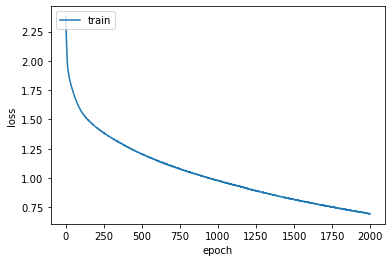

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

pred_count = 50
seq_out = ['g8', 'e8', 'e4', 'f8']

2/2 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.7400
accuracy: 74.00%


In [16]:
pred_out = model.predict(x_train)

In [18]:
pred_out.shape

(50, 12)

In [ ]:
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

In [20]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)


In [21]:
# 1. 데이터 준비하기
        
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [22]:
# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

(50, 5)
one hot encoding vector size is  12


In [23]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [24]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [26]:
# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

Epoch 1/2000
4/4 - 0s - loss: 2.4863 - accuracy: 0.0200
Epoch 2/2000
4/4 - 0s - loss: 2.4452 - accuracy: 0.3400
Epoch 3/2000
4/4 - 0s - loss: 2.4067 - accuracy: 0.3400
Epoch 4/2000
4/4 - 0s - loss: 2.3704 - accuracy: 0.3400
Epoch 5/2000
4/4 - 0s - loss: 2.3251 - accuracy: 0.3400
Epoch 6/2000
4/4 - 0s - loss: 2.2667 - accuracy: 0.3400
Epoch 7/2000
4/4 - 0s - loss: 2.1922 - accuracy: 0.3400
Epoch 8/2000
4/4 - 0s - loss: 2.1092 - accuracy: 0.3400
Epoch 9/2000
4/4 - 0s - loss: 2.0289 - accuracy: 0.3400
Epoch 10/2000
4/4 - 0s - loss: 1.9728 - accuracy: 0.3400
Epoch 11/2000
4/4 - 0s - loss: 1.9686 - accuracy: 0.3400
Epoch 12/2000
4/4 - 0s - loss: 1.9626 - accuracy: 0.3400
Epoch 13/2000
4/4 - 0s - loss: 1.9426 - accuracy: 0.3400
Epoch 14/2000
4/4 - 0s - loss: 1.9369 - accuracy: 0.3400
Epoch 15/2000
4/4 - 0s - loss: 1.9252 - accuracy: 0.3400
Epoch 16/2000
4/4 - 0s - loss: 1.9165 - accuracy: 0.3400
Epoch 17/2000
4/4 - 0s - loss: 1.9128 - accuracy: 0.3400
Epoch 18/2000
4/4 - 0s - loss: 1.9116 - 

Epoch 145/2000
4/4 - 0s - loss: 1.6631 - accuracy: 0.3600
Epoch 146/2000
4/4 - 0s - loss: 1.6639 - accuracy: 0.3600
Epoch 147/2000
4/4 - 0s - loss: 1.6538 - accuracy: 0.4000
Epoch 148/2000
4/4 - 0s - loss: 1.6524 - accuracy: 0.4400
Epoch 149/2000
4/4 - 0s - loss: 1.6516 - accuracy: 0.4000
Epoch 150/2000
4/4 - 0s - loss: 1.6577 - accuracy: 0.4000
Epoch 151/2000
4/4 - 0s - loss: 1.6400 - accuracy: 0.4400
Epoch 152/2000
4/4 - 0s - loss: 1.6398 - accuracy: 0.4200
Epoch 153/2000
4/4 - 0s - loss: 1.6384 - accuracy: 0.3800
Epoch 154/2000
4/4 - 0s - loss: 1.6362 - accuracy: 0.4200
Epoch 155/2000
4/4 - 0s - loss: 1.6380 - accuracy: 0.4000
Epoch 156/2000
4/4 - 0s - loss: 1.6253 - accuracy: 0.4400
Epoch 157/2000
4/4 - 0s - loss: 1.6363 - accuracy: 0.3800
Epoch 158/2000
4/4 - 0s - loss: 1.6363 - accuracy: 0.3800
Epoch 159/2000
4/4 - 0s - loss: 1.6177 - accuracy: 0.4400
Epoch 160/2000
4/4 - 0s - loss: 1.6197 - accuracy: 0.4200
Epoch 161/2000
4/4 - 0s - loss: 1.6223 - accuracy: 0.4200
Epoch 162/2000

Epoch 287/2000
4/4 - 0s - loss: 1.3640 - accuracy: 0.5600
Epoch 288/2000
4/4 - 0s - loss: 1.3569 - accuracy: 0.5200
Epoch 289/2000
4/4 - 0s - loss: 1.3483 - accuracy: 0.5400
Epoch 290/2000
4/4 - 0s - loss: 1.3494 - accuracy: 0.5600
Epoch 291/2000
4/4 - 0s - loss: 1.3737 - accuracy: 0.5600
Epoch 292/2000
4/4 - 0s - loss: 1.3551 - accuracy: 0.5200
Epoch 293/2000
4/4 - 0s - loss: 1.3486 - accuracy: 0.5000
Epoch 294/2000
4/4 - 0s - loss: 1.3381 - accuracy: 0.5200
Epoch 295/2000
4/4 - 0s - loss: 1.3508 - accuracy: 0.5600
Epoch 296/2000
4/4 - 0s - loss: 1.3416 - accuracy: 0.5600
Epoch 297/2000
4/4 - 0s - loss: 1.3466 - accuracy: 0.5000
Epoch 298/2000
4/4 - 0s - loss: 1.3312 - accuracy: 0.5400
Epoch 299/2000
4/4 - 0s - loss: 1.3469 - accuracy: 0.4800
Epoch 300/2000
4/4 - 0s - loss: 1.3608 - accuracy: 0.5000
Epoch 301/2000
4/4 - 0s - loss: 1.3492 - accuracy: 0.5000
Epoch 302/2000
4/4 - 0s - loss: 1.3314 - accuracy: 0.5400
Epoch 303/2000
4/4 - 0s - loss: 1.3499 - accuracy: 0.4800
Epoch 304/2000

Epoch 429/2000
4/4 - 0s - loss: 1.1278 - accuracy: 0.5400
Epoch 430/2000
4/4 - 0s - loss: 1.1234 - accuracy: 0.5200
Epoch 431/2000
4/4 - 0s - loss: 1.1314 - accuracy: 0.5600
Epoch 432/2000
4/4 - 0s - loss: 1.1436 - accuracy: 0.5000
Epoch 433/2000
4/4 - 0s - loss: 1.1280 - accuracy: 0.5800
Epoch 434/2000
4/4 - 0s - loss: 1.1192 - accuracy: 0.5800
Epoch 435/2000
4/4 - 0s - loss: 1.1124 - accuracy: 0.5200
Epoch 436/2000
4/4 - 0s - loss: 1.1258 - accuracy: 0.5400
Epoch 437/2000
4/4 - 0s - loss: 1.1117 - accuracy: 0.5600
Epoch 438/2000
4/4 - 0s - loss: 1.1156 - accuracy: 0.5600
Epoch 439/2000
4/4 - 0s - loss: 1.1147 - accuracy: 0.5400
Epoch 440/2000
4/4 - 0s - loss: 1.1116 - accuracy: 0.5400
Epoch 441/2000
4/4 - 0s - loss: 1.0946 - accuracy: 0.5400
Epoch 442/2000
4/4 - 0s - loss: 1.1175 - accuracy: 0.5600
Epoch 443/2000
4/4 - 0s - loss: 1.1017 - accuracy: 0.5600
Epoch 444/2000
4/4 - 0s - loss: 1.1168 - accuracy: 0.5600
Epoch 445/2000
4/4 - 0s - loss: 1.1173 - accuracy: 0.6000
Epoch 446/2000

Epoch 571/2000
4/4 - 0s - loss: 0.8544 - accuracy: 0.6600
Epoch 572/2000
4/4 - 0s - loss: 0.8482 - accuracy: 0.6600
Epoch 573/2000
4/4 - 0s - loss: 0.8517 - accuracy: 0.6400
Epoch 574/2000
4/4 - 0s - loss: 0.8482 - accuracy: 0.6600
Epoch 575/2000
4/4 - 0s - loss: 0.8612 - accuracy: 0.6600
Epoch 576/2000
4/4 - 0s - loss: 0.8501 - accuracy: 0.6800
Epoch 577/2000
4/4 - 0s - loss: 0.8588 - accuracy: 0.6800
Epoch 578/2000
4/4 - 0s - loss: 0.8389 - accuracy: 0.7000
Epoch 579/2000
4/4 - 0s - loss: 0.8638 - accuracy: 0.7000
Epoch 580/2000
4/4 - 0s - loss: 0.8452 - accuracy: 0.6600
Epoch 581/2000
4/4 - 0s - loss: 0.8342 - accuracy: 0.7000
Epoch 582/2000
4/4 - 0s - loss: 0.8313 - accuracy: 0.6800
Epoch 583/2000
4/4 - 0s - loss: 0.8268 - accuracy: 0.7000
Epoch 584/2000
4/4 - 0s - loss: 0.8309 - accuracy: 0.6600
Epoch 585/2000
4/4 - 0s - loss: 0.8199 - accuracy: 0.7000
Epoch 586/2000
4/4 - 0s - loss: 0.8224 - accuracy: 0.7000
Epoch 587/2000
4/4 - 0s - loss: 0.8107 - accuracy: 0.7200
Epoch 588/2000

Epoch 713/2000
4/4 - 0s - loss: 0.6659 - accuracy: 0.7600
Epoch 714/2000
4/4 - 0s - loss: 0.6514 - accuracy: 0.7800
Epoch 715/2000
4/4 - 0s - loss: 0.6428 - accuracy: 0.7800
Epoch 716/2000
4/4 - 0s - loss: 0.6449 - accuracy: 0.8200
Epoch 717/2000
4/4 - 0s - loss: 0.6327 - accuracy: 0.8200
Epoch 718/2000
4/4 - 0s - loss: 0.6254 - accuracy: 0.8200
Epoch 719/2000
4/4 - 0s - loss: 0.6369 - accuracy: 0.8000
Epoch 720/2000
4/4 - 0s - loss: 0.6368 - accuracy: 0.8200
Epoch 721/2000
4/4 - 0s - loss: 0.6437 - accuracy: 0.7800
Epoch 722/2000
4/4 - 0s - loss: 0.6349 - accuracy: 0.8200
Epoch 723/2000
4/4 - 0s - loss: 0.6573 - accuracy: 0.7400
Epoch 724/2000
4/4 - 0s - loss: 0.6398 - accuracy: 0.7800
Epoch 725/2000
4/4 - 0s - loss: 0.6455 - accuracy: 0.8000
Epoch 726/2000
4/4 - 0s - loss: 0.6392 - accuracy: 0.7800
Epoch 727/2000
4/4 - 0s - loss: 0.6435 - accuracy: 0.8000
Epoch 728/2000
4/4 - 0s - loss: 0.6244 - accuracy: 0.8200
Epoch 729/2000
4/4 - 0s - loss: 0.6400 - accuracy: 0.8000
Epoch 730/2000

Epoch 855/2000
4/4 - 0s - loss: 0.5365 - accuracy: 0.8000
Epoch 856/2000
4/4 - 0s - loss: 0.5494 - accuracy: 0.7600
Epoch 857/2000
4/4 - 0s - loss: 0.5406 - accuracy: 0.8400
Epoch 858/2000
4/4 - 0s - loss: 0.5452 - accuracy: 0.8400
Epoch 859/2000
4/4 - 0s - loss: 0.5805 - accuracy: 0.8000
Epoch 860/2000
4/4 - 0s - loss: 0.5104 - accuracy: 0.8800
Epoch 861/2000
4/4 - 0s - loss: 0.5456 - accuracy: 0.8000
Epoch 862/2000
4/4 - 0s - loss: 0.5661 - accuracy: 0.7600
Epoch 863/2000
4/4 - 0s - loss: 0.5543 - accuracy: 0.8400
Epoch 864/2000
4/4 - 0s - loss: 0.5394 - accuracy: 0.8200
Epoch 865/2000
4/4 - 0s - loss: 0.5666 - accuracy: 0.7400
Epoch 866/2000
4/4 - 0s - loss: 0.6255 - accuracy: 0.7600
Epoch 867/2000
4/4 - 0s - loss: 0.5291 - accuracy: 0.8400
Epoch 868/2000
4/4 - 0s - loss: 0.5679 - accuracy: 0.7800
Epoch 869/2000
4/4 - 0s - loss: 0.5676 - accuracy: 0.7600
Epoch 870/2000
4/4 - 0s - loss: 0.5646 - accuracy: 0.8000
Epoch 871/2000
4/4 - 0s - loss: 0.5416 - accuracy: 0.8000
Epoch 872/2000

Epoch 997/2000
4/4 - 0s - loss: 0.4725 - accuracy: 0.8400
Epoch 998/2000
4/4 - 0s - loss: 0.4778 - accuracy: 0.8000
Epoch 999/2000
4/4 - 0s - loss: 0.4880 - accuracy: 0.8400
Epoch 1000/2000
4/4 - 0s - loss: 0.4937 - accuracy: 0.8000
Epoch 1001/2000
4/4 - 0s - loss: 0.4745 - accuracy: 0.8400
Epoch 1002/2000
4/4 - 0s - loss: 0.4893 - accuracy: 0.8200
Epoch 1003/2000
4/4 - 0s - loss: 0.4411 - accuracy: 0.8400
Epoch 1004/2000
4/4 - 0s - loss: 0.4733 - accuracy: 0.8400
Epoch 1005/2000
4/4 - 0s - loss: 0.4624 - accuracy: 0.8600
Epoch 1006/2000
4/4 - 0s - loss: 0.4541 - accuracy: 0.8400
Epoch 1007/2000
4/4 - 0s - loss: 0.4571 - accuracy: 0.8400
Epoch 1008/2000
4/4 - 0s - loss: 0.4566 - accuracy: 0.8600
Epoch 1009/2000
4/4 - 0s - loss: 0.4478 - accuracy: 0.8600
Epoch 1010/2000
4/4 - 0s - loss: 0.4641 - accuracy: 0.8400
Epoch 1011/2000
4/4 - 0s - loss: 0.4885 - accuracy: 0.8000
Epoch 1012/2000
4/4 - 0s - loss: 0.4848 - accuracy: 0.8200
Epoch 1013/2000
4/4 - 0s - loss: 0.4614 - accuracy: 0.8600


Epoch 1136/2000
4/4 - 0s - loss: 0.4243 - accuracy: 0.8000
Epoch 1137/2000
4/4 - 0s - loss: 0.4442 - accuracy: 0.8600
Epoch 1138/2000
4/4 - 0s - loss: 0.4205 - accuracy: 0.8200
Epoch 1139/2000
4/4 - 0s - loss: 0.4190 - accuracy: 0.8200
Epoch 1140/2000
4/4 - 0s - loss: 0.4102 - accuracy: 0.8600
Epoch 1141/2000
4/4 - 0s - loss: 0.4091 - accuracy: 0.8600
Epoch 1142/2000
4/4 - 0s - loss: 0.4202 - accuracy: 0.8400
Epoch 1143/2000
4/4 - 0s - loss: 0.4007 - accuracy: 0.8800
Epoch 1144/2000
4/4 - 0s - loss: 0.4296 - accuracy: 0.8400
Epoch 1145/2000
4/4 - 0s - loss: 0.4080 - accuracy: 0.8600
Epoch 1146/2000
4/4 - 0s - loss: 0.4477 - accuracy: 0.8000
Epoch 1147/2000
4/4 - 0s - loss: 0.4137 - accuracy: 0.8200
Epoch 1148/2000
4/4 - 0s - loss: 0.4262 - accuracy: 0.8400
Epoch 1149/2000
4/4 - 0s - loss: 0.4399 - accuracy: 0.8400
Epoch 1150/2000
4/4 - 0s - loss: 0.4175 - accuracy: 0.8600
Epoch 1151/2000
4/4 - 0s - loss: 0.4124 - accuracy: 0.8200
Epoch 1152/2000
4/4 - 0s - loss: 0.4247 - accuracy: 0.86

Epoch 1275/2000
4/4 - 0s - loss: 0.3694 - accuracy: 0.8800
Epoch 1276/2000
4/4 - 0s - loss: 0.3894 - accuracy: 0.8400
Epoch 1277/2000
4/4 - 0s - loss: 0.3798 - accuracy: 0.8800
Epoch 1278/2000
4/4 - 0s - loss: 0.3839 - accuracy: 0.8400
Epoch 1279/2000
4/4 - 0s - loss: 0.4001 - accuracy: 0.8400
Epoch 1280/2000
4/4 - 0s - loss: 0.3848 - accuracy: 0.8600
Epoch 1281/2000
4/4 - 0s - loss: 0.3804 - accuracy: 0.8600
Epoch 1282/2000
4/4 - 0s - loss: 0.3861 - accuracy: 0.8400
Epoch 1283/2000
4/4 - 0s - loss: 0.3726 - accuracy: 0.8600
Epoch 1284/2000
4/4 - 0s - loss: 0.3818 - accuracy: 0.8400
Epoch 1285/2000
4/4 - 0s - loss: 0.4005 - accuracy: 0.8600
Epoch 1286/2000
4/4 - 0s - loss: 0.3754 - accuracy: 0.8600
Epoch 1287/2000
4/4 - 0s - loss: 0.4031 - accuracy: 0.8200
Epoch 1288/2000
4/4 - 0s - loss: 0.5201 - accuracy: 0.8000
Epoch 1289/2000
4/4 - 0s - loss: 0.4819 - accuracy: 0.8200
Epoch 1290/2000
4/4 - 0s - loss: 0.4906 - accuracy: 0.8200
Epoch 1291/2000
4/4 - 0s - loss: 0.4546 - accuracy: 0.80

Epoch 1414/2000
4/4 - 0s - loss: 0.3631 - accuracy: 0.8800
Epoch 1415/2000
4/4 - 0s - loss: 0.3443 - accuracy: 0.8600
Epoch 1416/2000
4/4 - 0s - loss: 0.3562 - accuracy: 0.8600
Epoch 1417/2000
4/4 - 0s - loss: 0.3604 - accuracy: 0.8600
Epoch 1418/2000
4/4 - 0s - loss: 0.3605 - accuracy: 0.8400
Epoch 1419/2000
4/4 - 0s - loss: 0.3489 - accuracy: 0.8600
Epoch 1420/2000
4/4 - 0s - loss: 0.3435 - accuracy: 0.8800
Epoch 1421/2000
4/4 - 0s - loss: 0.3750 - accuracy: 0.8400
Epoch 1422/2000
4/4 - 0s - loss: 0.3537 - accuracy: 0.8600
Epoch 1423/2000
4/4 - 0s - loss: 0.3534 - accuracy: 0.8600
Epoch 1424/2000
4/4 - 0s - loss: 0.3451 - accuracy: 0.8800
Epoch 1425/2000
4/4 - 0s - loss: 0.3599 - accuracy: 0.8600
Epoch 1426/2000
4/4 - 0s - loss: 0.3528 - accuracy: 0.8600
Epoch 1427/2000
4/4 - 0s - loss: 0.3489 - accuracy: 0.8600
Epoch 1428/2000
4/4 - 0s - loss: 0.3438 - accuracy: 0.8600
Epoch 1429/2000
4/4 - 0s - loss: 0.3468 - accuracy: 0.8800
Epoch 1430/2000
4/4 - 0s - loss: 0.3487 - accuracy: 0.86

Epoch 1553/2000
4/4 - 0s - loss: 0.3295 - accuracy: 0.8800
Epoch 1554/2000
4/4 - 0s - loss: 0.3389 - accuracy: 0.8800
Epoch 1555/2000
4/4 - 0s - loss: 0.3250 - accuracy: 0.8800
Epoch 1556/2000
4/4 - 0s - loss: 0.3268 - accuracy: 0.9000
Epoch 1557/2000
4/4 - 0s - loss: 0.3355 - accuracy: 0.9000
Epoch 1558/2000
4/4 - 0s - loss: 0.3312 - accuracy: 0.9000
Epoch 1559/2000
4/4 - 0s - loss: 0.3268 - accuracy: 0.8600
Epoch 1560/2000
4/4 - 0s - loss: 0.3329 - accuracy: 0.8600
Epoch 1561/2000
4/4 - 0s - loss: 0.3342 - accuracy: 0.8400
Epoch 1562/2000
4/4 - 0s - loss: 0.3250 - accuracy: 0.8800
Epoch 1563/2000
4/4 - 0s - loss: 0.3389 - accuracy: 0.8600
Epoch 1564/2000
4/4 - 0s - loss: 0.3377 - accuracy: 0.8600
Epoch 1565/2000
4/4 - 0s - loss: 0.3273 - accuracy: 0.8800
Epoch 1566/2000
4/4 - 0s - loss: 0.3316 - accuracy: 0.8800
Epoch 1567/2000
4/4 - 0s - loss: 0.3268 - accuracy: 0.8600
Epoch 1568/2000
4/4 - 0s - loss: 0.3294 - accuracy: 0.8600
Epoch 1569/2000
4/4 - 0s - loss: 0.3277 - accuracy: 0.84

Epoch 1692/2000
4/4 - 0s - loss: 0.3152 - accuracy: 0.8600
Epoch 1693/2000
4/4 - 0s - loss: 0.3397 - accuracy: 0.8600
Epoch 1694/2000
4/4 - 0s - loss: 0.3356 - accuracy: 0.8800
Epoch 1695/2000
4/4 - 0s - loss: 0.3126 - accuracy: 0.8800
Epoch 1696/2000
4/4 - 0s - loss: 0.3368 - accuracy: 0.8800
Epoch 1697/2000
4/4 - 0s - loss: 0.3135 - accuracy: 0.9000
Epoch 1698/2000
4/4 - 0s - loss: 0.3128 - accuracy: 0.8600
Epoch 1699/2000
4/4 - 0s - loss: 0.3181 - accuracy: 0.8400
Epoch 1700/2000
4/4 - 0s - loss: 0.3186 - accuracy: 0.8600
Epoch 1701/2000
4/4 - 0s - loss: 0.3152 - accuracy: 0.8600
Epoch 1702/2000
4/4 - 0s - loss: 0.3168 - accuracy: 0.9000
Epoch 1703/2000
4/4 - 0s - loss: 0.3079 - accuracy: 0.9000
Epoch 1704/2000
4/4 - 0s - loss: 0.3148 - accuracy: 0.8600
Epoch 1705/2000
4/4 - 0s - loss: 0.3184 - accuracy: 0.8400
Epoch 1706/2000
4/4 - 0s - loss: 0.3128 - accuracy: 0.8600
Epoch 1707/2000
4/4 - 0s - loss: 0.3067 - accuracy: 0.8400
Epoch 1708/2000
4/4 - 0s - loss: 0.3101 - accuracy: 0.88

Epoch 1831/2000
4/4 - 0s - loss: 0.3213 - accuracy: 0.8600
Epoch 1832/2000
4/4 - 0s - loss: 0.3222 - accuracy: 0.8400
Epoch 1833/2000
4/4 - 0s - loss: 0.3103 - accuracy: 0.8400
Epoch 1834/2000
4/4 - 0s - loss: 0.3043 - accuracy: 0.8400
Epoch 1835/2000
4/4 - 0s - loss: 0.3042 - accuracy: 0.8800
Epoch 1836/2000
4/4 - 0s - loss: 0.3053 - accuracy: 0.9000
Epoch 1837/2000
4/4 - 0s - loss: 0.3103 - accuracy: 0.8600
Epoch 1838/2000
4/4 - 0s - loss: 0.3119 - accuracy: 0.8600
Epoch 1839/2000
4/4 - 0s - loss: 0.3102 - accuracy: 0.8800
Epoch 1840/2000
4/4 - 0s - loss: 0.3040 - accuracy: 0.8800
Epoch 1841/2000
4/4 - 0s - loss: 0.3154 - accuracy: 0.8800
Epoch 1842/2000
4/4 - 0s - loss: 0.3018 - accuracy: 0.8600
Epoch 1843/2000
4/4 - 0s - loss: 0.3002 - accuracy: 0.8800
Epoch 1844/2000
4/4 - 0s - loss: 0.3005 - accuracy: 0.8600
Epoch 1845/2000
4/4 - 0s - loss: 0.2936 - accuracy: 0.8800
Epoch 1846/2000
4/4 - 0s - loss: 0.2981 - accuracy: 0.9000
Epoch 1847/2000
4/4 - 0s - loss: 0.3041 - accuracy: 0.88

Epoch 1970/2000
4/4 - 0s - loss: 0.2902 - accuracy: 0.9000
Epoch 1971/2000
4/4 - 0s - loss: 0.2900 - accuracy: 0.8800
Epoch 1972/2000
4/4 - 0s - loss: 0.3002 - accuracy: 0.8800
Epoch 1973/2000
4/4 - 0s - loss: 0.2894 - accuracy: 0.9000
Epoch 1974/2000
4/4 - 0s - loss: 0.2911 - accuracy: 0.8600
Epoch 1975/2000
4/4 - 0s - loss: 0.2959 - accuracy: 0.9200
Epoch 1976/2000
4/4 - 0s - loss: 0.2916 - accuracy: 0.8600
Epoch 1977/2000
4/4 - 0s - loss: 0.2895 - accuracy: 0.8800
Epoch 1978/2000
4/4 - 0s - loss: 0.2957 - accuracy: 0.8800
Epoch 1979/2000
4/4 - 0s - loss: 0.2990 - accuracy: 0.8800
Epoch 1980/2000
4/4 - 0s - loss: 0.2895 - accuracy: 0.8800
Epoch 1981/2000
4/4 - 0s - loss: 0.2932 - accuracy: 0.8800
Epoch 1982/2000
4/4 - 0s - loss: 0.2987 - accuracy: 0.8800
Epoch 1983/2000
4/4 - 0s - loss: 0.3030 - accuracy: 0.9000
Epoch 1984/2000
4/4 - 0s - loss: 0.3223 - accuracy: 0.8800
Epoch 1985/2000
4/4 - 0s - loss: 0.3098 - accuracy: 0.8800
Epoch 1986/2000
4/4 - 0s - loss: 0.3382 - accuracy: 0.84

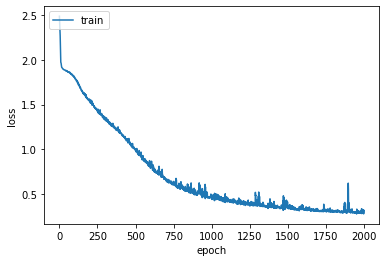

In [27]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [28]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.8800
accuracy: 88.00%


In [29]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'f4', 'f4', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'g8', 'e8', 'd4', 'c8', 'd8', 'd8', 'f8', 'g8', 'g8', 'e8', 'g8', 'e4', 'f8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8']


epochs : 0
50/50 - 0s - loss: 2.3830 - accuracy: 0.2800
epochs : 1
50/50 - 0s - loss: 1.9963 - accuracy: 0.3400
epochs : 2
50/50 - 0s - loss: 1.9546 - accuracy: 0.3400
epochs : 3
50/50 - 0s - loss: 1.9401 - accuracy: 0.3400
epochs : 4
50/50 - 0s - loss: 1.9315 - accuracy: 0.3400
epochs : 5
50/50 - 0s - loss: 1.9251 - accuracy: 0.3400
epochs : 6
50/50 - 0s - loss: 1.9200 - accuracy: 0.3400
epochs : 7
50/50 - 0s - loss: 1.9156 - accuracy: 0.3600
epochs : 8
50/50 - 0s - loss: 1.9117 - accuracy: 0.3600
epochs : 9
50/50 - 0s - loss: 1.9078 - accuracy: 0.3600
epochs : 10
50/50 - 0s - loss: 1.9037 - accuracy: 0.3600
epochs : 11
50/50 - 0s - loss: 1.8990 - accuracy: 0.3600
epochs : 12
50/50 - 0s - loss: 1.8928 - accuracy: 0.3600
epochs : 13
50/50 - 0s - loss: 1.8896 - accuracy: 0.3600
epochs : 14
50/50 - 0s - loss: 1.8725 - accuracy: 0.3600
epochs : 15
50/50 - 0s - loss: 2.3379 - accuracy: 0.3200
epochs : 16
50/50 - 0s - loss: 1.9034 - accuracy: 0.3400
epochs : 17
50/50 - 0s - loss: 1.8886 - a

50/50 - 0s - loss: 1.0431 - accuracy: 0.6800
epochs : 144
50/50 - 0s - loss: 0.8742 - accuracy: 0.6600
epochs : 145
50/50 - 0s - loss: 0.6592 - accuracy: 0.8200
epochs : 146
50/50 - 0s - loss: 0.6630 - accuracy: 0.8200
epochs : 147
50/50 - 0s - loss: 0.4131 - accuracy: 0.9200
epochs : 148
50/50 - 0s - loss: 0.5588 - accuracy: 0.8000
epochs : 149
50/50 - 0s - loss: 0.4753 - accuracy: 0.9000
epochs : 150
50/50 - 0s - loss: 0.6300 - accuracy: 0.7800
epochs : 151
50/50 - 0s - loss: 0.6605 - accuracy: 0.7200
epochs : 152
50/50 - 0s - loss: 0.8741 - accuracy: 0.6800
epochs : 153
50/50 - 0s - loss: 0.3838 - accuracy: 0.9200
epochs : 154
50/50 - 0s - loss: 0.2819 - accuracy: 0.9400
epochs : 155
50/50 - 0s - loss: 0.4669 - accuracy: 0.8200
epochs : 156
50/50 - 0s - loss: 0.6522 - accuracy: 0.7600
epochs : 157
50/50 - 0s - loss: 0.7838 - accuracy: 0.7200
epochs : 158
50/50 - 0s - loss: 0.4995 - accuracy: 0.8800
epochs : 159
50/50 - 0s - loss: 1.2529 - accuracy: 0.6000
epochs : 160
50/50 - 0s - l

epochs : 283
50/50 - 0s - loss: 3.4445e-04 - accuracy: 1.0000
epochs : 284
50/50 - 0s - loss: 3.3241e-04 - accuracy: 1.0000
epochs : 285
50/50 - 0s - loss: 3.2100e-04 - accuracy: 1.0000
epochs : 286
50/50 - 0s - loss: 3.0949e-04 - accuracy: 1.0000
epochs : 287
50/50 - 0s - loss: 2.9866e-04 - accuracy: 1.0000
epochs : 288
50/50 - 0s - loss: 2.8802e-04 - accuracy: 1.0000
epochs : 289
50/50 - 0s - loss: 2.7806e-04 - accuracy: 1.0000
epochs : 290
50/50 - 0s - loss: 2.6846e-04 - accuracy: 1.0000
epochs : 291
50/50 - 0s - loss: 2.5947e-04 - accuracy: 1.0000
epochs : 292
50/50 - 0s - loss: 2.5090e-04 - accuracy: 1.0000
epochs : 293
50/50 - 0s - loss: 2.4285e-04 - accuracy: 1.0000
epochs : 294
50/50 - 0s - loss: 2.3518e-04 - accuracy: 1.0000
epochs : 295
50/50 - 0s - loss: 2.2796e-04 - accuracy: 1.0000
epochs : 296
50/50 - 0s - loss: 2.2103e-04 - accuracy: 1.0000
epochs : 297
50/50 - 0s - loss: 2.1444e-04 - accuracy: 1.0000
epochs : 298
50/50 - 0s - loss: 2.0814e-04 - accuracy: 1.0000
epochs :

epochs : 415
50/50 - 0s - loss: 8.5782e-06 - accuracy: 1.0000
epochs : 416
50/50 - 0s - loss: 8.3589e-06 - accuracy: 1.0000
epochs : 417
50/50 - 0s - loss: 8.1610e-06 - accuracy: 1.0000
epochs : 418
50/50 - 0s - loss: 7.9560e-06 - accuracy: 1.0000
epochs : 419
50/50 - 0s - loss: 7.7533e-06 - accuracy: 1.0000
epochs : 420
50/50 - 0s - loss: 7.5483e-06 - accuracy: 1.0000
epochs : 421
50/50 - 0s - loss: 7.3623e-06 - accuracy: 1.0000
epochs : 422
50/50 - 0s - loss: 7.1764e-06 - accuracy: 1.0000
epochs : 423
50/50 - 0s - loss: 7.0023e-06 - accuracy: 1.0000
epochs : 424
50/50 - 0s - loss: 6.8020e-06 - accuracy: 1.0000
epochs : 425
50/50 - 0s - loss: 6.6304e-06 - accuracy: 1.0000
epochs : 426
50/50 - 0s - loss: 6.4683e-06 - accuracy: 1.0000
epochs : 427
50/50 - 0s - loss: 6.2966e-06 - accuracy: 1.0000
epochs : 428
50/50 - 0s - loss: 6.1488e-06 - accuracy: 1.0000
epochs : 429
50/50 - 0s - loss: 5.9867e-06 - accuracy: 1.0000
epochs : 430
50/50 - 0s - loss: 5.8245e-06 - accuracy: 1.0000
epochs :

epochs : 554
50/50 - 0s - loss: 0.0029 - accuracy: 1.0000
epochs : 555
50/50 - 0s - loss: 0.0027 - accuracy: 1.0000
epochs : 556
50/50 - 0s - loss: 0.0026 - accuracy: 1.0000
epochs : 557
50/50 - 0s - loss: 0.0025 - accuracy: 1.0000
epochs : 558
50/50 - 0s - loss: 0.0024 - accuracy: 1.0000
epochs : 559
50/50 - 0s - loss: 0.0023 - accuracy: 1.0000
epochs : 560
50/50 - 0s - loss: 0.0022 - accuracy: 1.0000
epochs : 561
50/50 - 0s - loss: 0.0021 - accuracy: 1.0000
epochs : 562
50/50 - 0s - loss: 0.0020 - accuracy: 1.0000
epochs : 563
50/50 - 0s - loss: 0.0020 - accuracy: 1.0000
epochs : 564
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 565
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 566
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 567
50/50 - 0s - loss: 0.0018 - accuracy: 1.0000
epochs : 568
50/50 - 0s - loss: 0.0018 - accuracy: 1.0000
epochs : 569
50/50 - 0s - loss: 0.0017 - accuracy: 1.0000
epochs : 570
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 571
5

epochs : 695
50/50 - 0s - loss: 1.8515 - accuracy: 0.4000
epochs : 696
50/50 - 0s - loss: 1.5559 - accuracy: 0.4400
epochs : 697
50/50 - 0s - loss: 1.5578 - accuracy: 0.5400
epochs : 698
50/50 - 0s - loss: 1.0617 - accuracy: 0.6000
epochs : 699
50/50 - 0s - loss: 0.5421 - accuracy: 0.8000
epochs : 700
50/50 - 0s - loss: 0.5466 - accuracy: 0.8000
epochs : 701
50/50 - 0s - loss: 0.8258 - accuracy: 0.6200
epochs : 702
50/50 - 0s - loss: 0.6376 - accuracy: 0.8000
epochs : 703
50/50 - 0s - loss: 1.2790 - accuracy: 0.5800
epochs : 704
50/50 - 0s - loss: 0.7542 - accuracy: 0.7400
epochs : 705
50/50 - 0s - loss: 0.6809 - accuracy: 0.7200
epochs : 706
50/50 - 0s - loss: 0.9585 - accuracy: 0.7000
epochs : 707
50/50 - 0s - loss: 0.4712 - accuracy: 0.8600
epochs : 708
50/50 - 0s - loss: 0.5270 - accuracy: 0.7600
epochs : 709
50/50 - 0s - loss: 0.3840 - accuracy: 0.9200
epochs : 710
50/50 - 0s - loss: 0.6249 - accuracy: 0.8400
epochs : 711
50/50 - 0s - loss: 0.2618 - accuracy: 0.9400
epochs : 712
5

epochs : 832
50/50 - 0s - loss: 1.3959e-04 - accuracy: 1.0000
epochs : 833
50/50 - 0s - loss: 1.3625e-04 - accuracy: 1.0000
epochs : 834
50/50 - 0s - loss: 1.3295e-04 - accuracy: 1.0000
epochs : 835
50/50 - 0s - loss: 1.2972e-04 - accuracy: 1.0000
epochs : 836
50/50 - 0s - loss: 1.2655e-04 - accuracy: 1.0000
epochs : 837
50/50 - 0s - loss: 1.2343e-04 - accuracy: 1.0000
epochs : 838
50/50 - 0s - loss: 1.2043e-04 - accuracy: 1.0000
epochs : 839
50/50 - 0s - loss: 1.1746e-04 - accuracy: 1.0000
epochs : 840
50/50 - 0s - loss: 1.1457e-04 - accuracy: 1.0000
epochs : 841
50/50 - 0s - loss: 1.1175e-04 - accuracy: 1.0000
epochs : 842
50/50 - 0s - loss: 1.0903e-04 - accuracy: 1.0000
epochs : 843
50/50 - 0s - loss: 1.0632e-04 - accuracy: 1.0000
epochs : 844
50/50 - 0s - loss: 1.0372e-04 - accuracy: 1.0000
epochs : 845
50/50 - 0s - loss: 1.0119e-04 - accuracy: 1.0000
epochs : 846
50/50 - 0s - loss: 9.8708e-05 - accuracy: 1.0000
epochs : 847
50/50 - 0s - loss: 9.6336e-05 - accuracy: 1.0000
epochs :

epochs : 965
50/50 - 0s - loss: 4.5490e-06 - accuracy: 1.0000
epochs : 966
50/50 - 0s - loss: 4.4322e-06 - accuracy: 1.0000
epochs : 967
50/50 - 0s - loss: 4.3344e-06 - accuracy: 1.0000
epochs : 968
50/50 - 0s - loss: 4.2224e-06 - accuracy: 1.0000
epochs : 969
50/50 - 0s - loss: 4.1270e-06 - accuracy: 1.0000
epochs : 970
50/50 - 0s - loss: 4.0364e-06 - accuracy: 1.0000
epochs : 971
50/50 - 0s - loss: 3.9387e-06 - accuracy: 1.0000
epochs : 972
50/50 - 0s - loss: 3.8576e-06 - accuracy: 1.0000
epochs : 973
50/50 - 0s - loss: 3.7670e-06 - accuracy: 1.0000
epochs : 974
50/50 - 0s - loss: 3.6621e-06 - accuracy: 1.0000
epochs : 975
50/50 - 0s - loss: 3.5930e-06 - accuracy: 1.0000
epochs : 976
50/50 - 0s - loss: 3.5119e-06 - accuracy: 1.0000
epochs : 977
50/50 - 0s - loss: 3.4165e-06 - accuracy: 1.0000
epochs : 978
50/50 - 0s - loss: 3.3426e-06 - accuracy: 1.0000
epochs : 979
50/50 - 0s - loss: 3.2663e-06 - accuracy: 1.0000
epochs : 980
50/50 - 0s - loss: 3.1948e-06 - accuracy: 1.0000
epochs :

epochs : 1101
50/50 - 0s - loss: 3.7855e-04 - accuracy: 1.0000
epochs : 1102
50/50 - 0s - loss: 3.6503e-04 - accuracy: 1.0000
epochs : 1103
50/50 - 0s - loss: 3.5226e-04 - accuracy: 1.0000
epochs : 1104
50/50 - 0s - loss: 3.4017e-04 - accuracy: 1.0000
epochs : 1105
50/50 - 0s - loss: 3.2873e-04 - accuracy: 1.0000
epochs : 1106
50/50 - 0s - loss: 3.1790e-04 - accuracy: 1.0000
epochs : 1107
50/50 - 0s - loss: 3.0768e-04 - accuracy: 1.0000
epochs : 1108
50/50 - 0s - loss: 2.9803e-04 - accuracy: 1.0000
epochs : 1109
50/50 - 0s - loss: 2.8893e-04 - accuracy: 1.0000
epochs : 1110
50/50 - 0s - loss: 2.8040e-04 - accuracy: 1.0000
epochs : 1111
50/50 - 0s - loss: 2.7240e-04 - accuracy: 1.0000
epochs : 1112
50/50 - 0s - loss: 2.6496e-04 - accuracy: 1.0000
epochs : 1113
50/50 - 0s - loss: 2.5805e-04 - accuracy: 1.0000
epochs : 1114
50/50 - 0s - loss: 2.5164e-04 - accuracy: 1.0000
epochs : 1115
50/50 - 0s - loss: 2.4578e-04 - accuracy: 1.0000
epochs : 1116
50/50 - 0s - loss: 2.4034e-04 - accuracy:

epochs : 1232
50/50 - 0s - loss: 1.0347e-05 - accuracy: 1.0000
epochs : 1233
50/50 - 0s - loss: 1.0126e-05 - accuracy: 1.0000
epochs : 1234
50/50 - 0s - loss: 9.8895e-06 - accuracy: 1.0000
epochs : 1235
50/50 - 0s - loss: 9.6750e-06 - accuracy: 1.0000
epochs : 1236
50/50 - 0s - loss: 9.4532e-06 - accuracy: 1.0000
epochs : 1237
50/50 - 0s - loss: 9.2363e-06 - accuracy: 1.0000
epochs : 1238
50/50 - 0s - loss: 9.0241e-06 - accuracy: 1.0000
epochs : 1239
50/50 - 0s - loss: 8.7928e-06 - accuracy: 1.0000
epochs : 1240
50/50 - 0s - loss: 8.6092e-06 - accuracy: 1.0000
epochs : 1241
50/50 - 0s - loss: 8.3994e-06 - accuracy: 1.0000
epochs : 1242
50/50 - 0s - loss: 8.1992e-06 - accuracy: 1.0000
epochs : 1243
50/50 - 0s - loss: 7.9917e-06 - accuracy: 1.0000
epochs : 1244
50/50 - 0s - loss: 7.8105e-06 - accuracy: 1.0000
epochs : 1245
50/50 - 0s - loss: 7.6246e-06 - accuracy: 1.0000
epochs : 1246
50/50 - 0s - loss: 7.4339e-06 - accuracy: 1.0000
epochs : 1247
50/50 - 0s - loss: 7.2527e-06 - accuracy:

epochs : 1363
50/50 - 0s - loss: 4.4346e-07 - accuracy: 1.0000
epochs : 1364
50/50 - 0s - loss: 4.3154e-07 - accuracy: 1.0000
epochs : 1365
50/50 - 0s - loss: 4.1008e-07 - accuracy: 1.0000
epochs : 1366
50/50 - 0s - loss: 3.9101e-07 - accuracy: 1.0000
epochs : 1367
50/50 - 0s - loss: 3.9339e-07 - accuracy: 1.0000
epochs : 1368
50/50 - 0s - loss: 3.8624e-07 - accuracy: 1.0000
epochs : 1369
50/50 - 0s - loss: 3.7670e-07 - accuracy: 1.0000
epochs : 1370
50/50 - 0s - loss: 3.5763e-07 - accuracy: 1.0000
epochs : 1371
50/50 - 0s - loss: 3.4571e-07 - accuracy: 1.0000
epochs : 1372
50/50 - 0s - loss: 3.2663e-07 - accuracy: 1.0000
epochs : 1373
50/50 - 0s - loss: 3.2663e-07 - accuracy: 1.0000
epochs : 1374
50/50 - 0s - loss: 3.2425e-07 - accuracy: 1.0000
epochs : 1375
50/50 - 0s - loss: 3.0994e-07 - accuracy: 1.0000
epochs : 1376
50/50 - 0s - loss: 3.0041e-07 - accuracy: 1.0000
epochs : 1377
50/50 - 0s - loss: 2.9087e-07 - accuracy: 1.0000
epochs : 1378
50/50 - 0s - loss: 2.8372e-07 - accuracy:

epochs : 1496
50/50 - 0s - loss: 0.0256 - accuracy: 1.0000
epochs : 1497
50/50 - 0s - loss: 0.0226 - accuracy: 1.0000
epochs : 1498
50/50 - 0s - loss: 0.0202 - accuracy: 1.0000
epochs : 1499
50/50 - 0s - loss: 0.0182 - accuracy: 1.0000
epochs : 1500
50/50 - 0s - loss: 0.0164 - accuracy: 1.0000
epochs : 1501
50/50 - 0s - loss: 0.0149 - accuracy: 1.0000
epochs : 1502
50/50 - 0s - loss: 0.0135 - accuracy: 1.0000
epochs : 1503
50/50 - 0s - loss: 0.0123 - accuracy: 1.0000
epochs : 1504
50/50 - 0s - loss: 0.0116 - accuracy: 1.0000
epochs : 1505
50/50 - 0s - loss: 0.0115 - accuracy: 1.0000
epochs : 1506
50/50 - 0s - loss: 0.0115 - accuracy: 1.0000
epochs : 1507
50/50 - 0s - loss: 0.0115 - accuracy: 1.0000
epochs : 1508
50/50 - 0s - loss: 0.0104 - accuracy: 1.0000
epochs : 1509
50/50 - 0s - loss: 0.0080 - accuracy: 1.0000
epochs : 1510
50/50 - 0s - loss: 0.0067 - accuracy: 1.0000
epochs : 1511
50/50 - 0s - loss: 0.0065 - accuracy: 1.0000
epochs : 1512
50/50 - 0s - loss: 0.0065 - accuracy: 1.00

epochs : 1635
50/50 - 0s - loss: 0.0020 - accuracy: 1.0000
epochs : 1636
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 1637
50/50 - 0s - loss: 0.0018 - accuracy: 1.0000
epochs : 1638
50/50 - 0s - loss: 0.0017 - accuracy: 1.0000
epochs : 1639
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 1640
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 1641
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 1642
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 1643
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 1644
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 1645
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 1646
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 1647
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 1648
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 1649
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1650
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1651
50/50 - 0s - loss: 0.0010 - accuracy: 1.00

50/50 - 0s - loss: 2.6366e-05 - accuracy: 1.0000
epochs : 1767
50/50 - 0s - loss: 2.5641e-05 - accuracy: 1.0000
epochs : 1768
50/50 - 0s - loss: 2.4969e-05 - accuracy: 1.0000
epochs : 1769
50/50 - 0s - loss: 2.4311e-05 - accuracy: 1.0000
epochs : 1770
50/50 - 0s - loss: 2.3674e-05 - accuracy: 1.0000
epochs : 1771
50/50 - 0s - loss: 2.3052e-05 - accuracy: 1.0000
epochs : 1772
50/50 - 0s - loss: 2.2451e-05 - accuracy: 1.0000
epochs : 1773
50/50 - 0s - loss: 2.1877e-05 - accuracy: 1.0000
epochs : 1774
50/50 - 0s - loss: 2.1336e-05 - accuracy: 1.0000
epochs : 1775
50/50 - 0s - loss: 2.0790e-05 - accuracy: 1.0000
epochs : 1776
50/50 - 0s - loss: 2.0294e-05 - accuracy: 1.0000
epochs : 1777
50/50 - 0s - loss: 1.9800e-05 - accuracy: 1.0000
epochs : 1778
50/50 - 0s - loss: 1.9328e-05 - accuracy: 1.0000
epochs : 1779
50/50 - 0s - loss: 1.8906e-05 - accuracy: 1.0000
epochs : 1780
50/50 - 0s - loss: 1.8506e-05 - accuracy: 1.0000
epochs : 1781
50/50 - 0s - loss: 1.8127e-05 - accuracy: 1.0000
epochs

epochs : 1903
50/50 - 0s - loss: 6.9403e-04 - accuracy: 1.0000
epochs : 1904
50/50 - 0s - loss: 6.7266e-04 - accuracy: 1.0000
epochs : 1905
50/50 - 0s - loss: 6.5185e-04 - accuracy: 1.0000
epochs : 1906
50/50 - 0s - loss: 6.3152e-04 - accuracy: 1.0000
epochs : 1907
50/50 - 0s - loss: 6.1154e-04 - accuracy: 1.0000
epochs : 1908
50/50 - 0s - loss: 5.9189e-04 - accuracy: 1.0000
epochs : 1909
50/50 - 0s - loss: 5.7251e-04 - accuracy: 1.0000
epochs : 1910
50/50 - 0s - loss: 5.5339e-04 - accuracy: 1.0000
epochs : 1911
50/50 - 0s - loss: 5.3458e-04 - accuracy: 1.0000
epochs : 1912
50/50 - 0s - loss: 5.1609e-04 - accuracy: 1.0000
epochs : 1913
50/50 - 0s - loss: 4.9800e-04 - accuracy: 1.0000
epochs : 1914
50/50 - 0s - loss: 4.8027e-04 - accuracy: 1.0000
epochs : 1915
50/50 - 0s - loss: 4.6296e-04 - accuracy: 1.0000
epochs : 1916
50/50 - 0s - loss: 4.4604e-04 - accuracy: 1.0000
epochs : 1917
50/50 - 0s - loss: 4.2953e-04 - accuracy: 1.0000
epochs : 1918
50/50 - 0s - loss: 4.1347e-04 - accuracy:

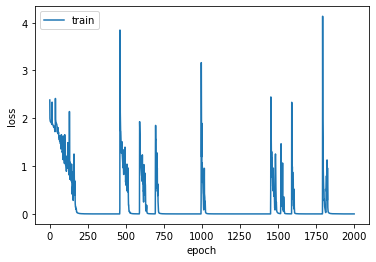

50/50 [==============================] - 0s 1ms/step - loss: 4.5319e-05 - accuracy: 1.0000
accuracy: 100.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [30]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)
